We use Euler scheme to simulate a path for SDE of the form
$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by
$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$
where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

We use P254-2-a of [Hir13] as an example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475; sig = .2
Mu = lambda x,t: r*x
Sigma = lambda x,t: sig*x


In [3]:
#Construct (Xh(t_i): 1 <= i <= n) for simulation on [T1, T2]

x0 = 100. #init state
T1, T2, n = 0., .5, 3 #init start time, end time, and the mesh number
t = np.linspace(T1, T2, num = n+1) #init mesh
Xh = x0 + np.zeros(n+1) #init state

for i in range(n):
    Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * (t[i+1] - t[i]) + Sigma(Xh[i], t[i])* np.sqrt(t[i+1] - t[i])*np.random.normal()
    
print(Xh)    

[100.          92.41776894 100.55705041 111.09450287]


Generate multiple paths and plot

In [4]:
def SDE_path(Mu, Sigma, x0, T1, T2, n): #para: drift, vol, initial state, start time, end time, and the mesh number 
    t = np.linspace(T1, T2, num = n+1) #init mesh 
    
    Xh = x0 + np.zeros(n+1) #init Xh
    for i in range(n): #run EM
        Xh[i+1] = Xh[i] + Mu(Xh[i], t[i]) * (t[i+1] - t[i]) + Sigma(Xh[i], t[i])* np.sqrt(t[i+1] - t[i])*np.random.normal()
        
    return t, Xh      

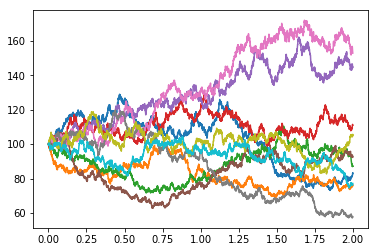

In [5]:
for i in range(10): 
    [t, Y] = SDE_path(Mu, Sigma, 100., 0., 2., 4000); 
    plt.plot(t,Y);

In [6]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def PutPay(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)


In [7]:
T = T2 - T1
K = 110.
MeshL = .0005
MeshN = int(T/MeshL)
IterN = 1000
PPay = np.zeros(IterN) #Simulation of payoff

for i in range(IterN):
    [t, Xh] = SDE_path(Mu, Sigma, x0, T1, T2, MeshN);
    PPay[i] = PutPay(r, T, K, Xh[-1])
    
PPrice = PPay.mean()   


In [8]:
print(PPrice)

10.112495527044343
